In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
calories= pd.read_csv('/content/calories.csv')
exercise= pd.read_csv('/content/exercise.csv')

In [5]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [38]:
exercise.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [37]:
calories.isnull().sum()

,0
User_ID,0
Calories,0


In [8]:
# COMBINING THESE 2 DATA
exercise= pd.concat([exercise, calories['Calories']], axis=1)

In [9]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [40]:
# get some statistical measures about the data
calories.describe()


,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


/tmp/ipython-input-3149007321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise['Age'])


<Axes: xlabel='Age', ylabel='Density'>

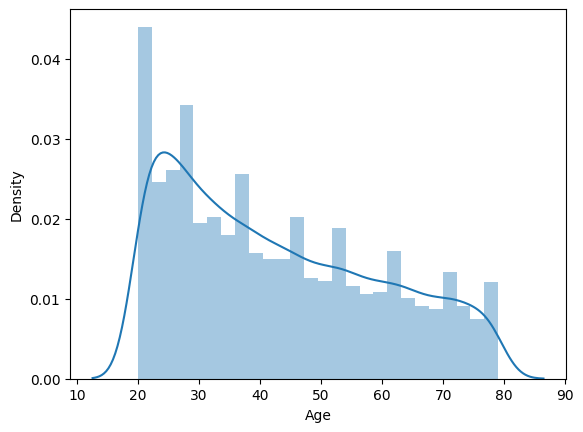

In [44]:
# finding the distribution of "Age" column

sns.distplot(exercise['Age'])

/tmp/ipython-input-2748872773.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise['Height'])


<Axes: xlabel='Height', ylabel='Density'>

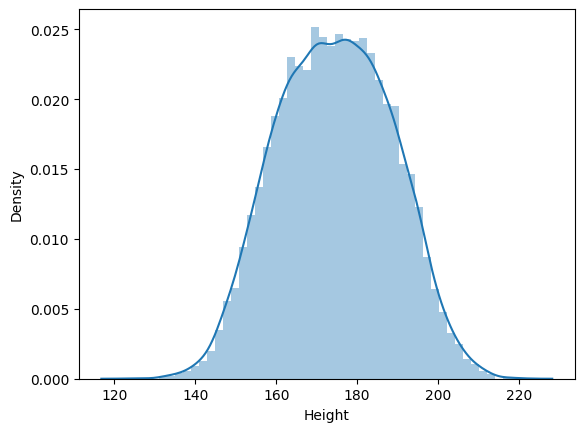

In [46]:
# finding the distribution of "Height" column
sns.distplot(exercise['Height'])

In [50]:
#Encoding categorical data into numerical data

exercise.replace({"Gender":{'male':0,'female':1}}, inplace=True)

/tmp/ipython-input-3423582668.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exercise.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [51]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [52]:
X = exercise.drop(columns=['User_ID','Calories'], axis=1)
Y = exercise['Calories']

In [53]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0        male   68   190.0    94.0      29.0       105.0       40.8
1      female   20   166.0    60.0      14.0        94.0       40.3
2        male   69   179.0    79.0       5.0        88.0       38.7
3      female   34   179.0    71.0      13.0       100.0       40.5
4      female   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995  female   20   193.0    86.0      11.0        92.0       40.4
14996  female   27   165.0    65.0       6.0        85.0       39.2
14997  female   43   159.0    58.0      16.0        90.0       40.1
14998    male   78   193.0    97.0       2.0        84.0       38.3
14999    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [54]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [56]:
#model training
model = XGBRegressor()

In [57]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [58]:
#prediction on test data
test_data_prediction = model.predict(X_test)

In [59]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [60]:
#mean absolute error
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [61]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4833678883314132


In [66]:
import joblib
joblib.dump(model, "my_model.pkl")


['my_model.pkl']

In [67]:
from google.colab import files
files.download("my_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>